In [32]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [33]:
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos_2\\df_final_2.csv', index_col=0)
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
0,6063.113615,480,5460.941980,4754.657517,4896.491342,0.883544,0.0,2919.463387,5164.253826,5550.381609,3587.013694,7063.134322,6116.130326,6060.595716,0.0,1.0
1,6063.113615,18300,11383.555059,12500.430163,4896.491342,0.873418,-0.5,6257.618269,8643.315620,9118.220511,2575.026622,7063.134322,6116.130326,6060.595716,0.0,1.0
2,6063.113615,9800,13332.987795,4754.657517,10732.002875,0.544304,-0.5,6215.009754,8643.315620,11254.324254,3587.013694,7063.134322,6116.130326,6060.595716,0.0,1.0
3,6063.113615,1500,3009.155313,4754.657517,4896.491342,-0.556962,0.0,6413.320982,5164.253826,5550.381609,7106.150521,4807.256389,6116.130326,6060.595716,0.0,1.0
4,6063.113615,3600,3009.155313,4754.657517,4896.491342,-0.632911,-1.2,6854.434814,8643.315620,6574.152684,7106.150521,7063.134322,6116.130326,6060.595716,0.0,1.0


In [35]:
# columnas_eliminar = ['abtest_control', 'abtest_test' ,'month_created', 'year_created', 'lastSeen', 'monthOfRegistration', 'dateCrawled']

In [36]:
# df.drop(columns=columnas_eliminar, inplace=True)

In [37]:
x= df.drop(columns='price')
y = df[['price']]

In [38]:
y.describe()

,price
count,343922.000000
mean,6116.605140
std,8244.929837
min,301.000000
25%,1450.000000
50%,3350.000000
75%,7790.000000
max,179999.000000


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [40]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [41]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[ 8526.45082878],
       [10242.6654504 ],
       [14793.7794911 ]])

In [42]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[10890.59225872],
       [ 3957.95788564],
       [ -534.54745034]])

In [43]:
metricas = {
'train': {
    'r2_score': r2_score(y_train, y_train_pred),
    'MAE': mean_absolute_error(y_train, y_train_pred),
    'MSE': mean_squared_error(y_train, y_train_pred),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
},
'test': {
    'r2_score': r2_score(y_test, y_test_pred),
    'MAE': mean_absolute_error(y_test, y_test_pred),
    'MSE': mean_squared_error(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

}
}

pd.DataFrame(metricas).T

,r2_score,MAE,MSE,RMSE
train,0.575515,3217.973419,2.890371e+07,5376.216712
test,0.579846,3203.528715,2.845079e+07,5333.927733


In [44]:
# Convertir a arrays planos si son multidimensionales
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

Text(0, 0.5, 'Predicciones (y_test_pred)')

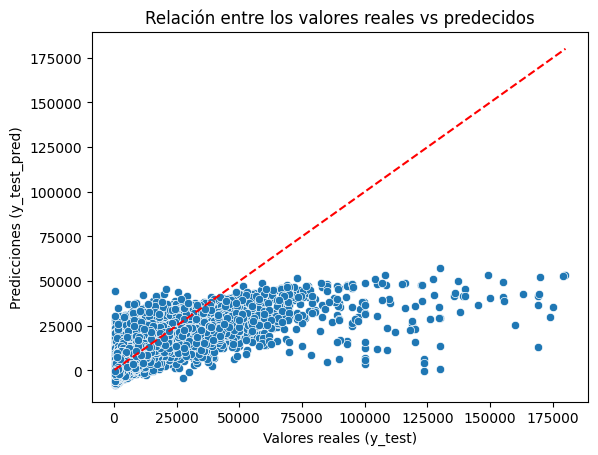

In [45]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

# Cross Validation

In [46]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

## K Fold

In [47]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_r2 = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="r2")

score_r2 # me quedo con la media de mis r2
np.mean(score_r2)

0.5769526674396915

In [48]:
kf = KFold(n_splits=5, #entre 5 y 10
           shuffle=True, # puede repetir cajas
           random_state=42)

score_mse = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="neg_mean_squared_error")

score_mse # me quedo con la media de mis r2
abs(np.mean(score_mse))

28770635.147652615

In [49]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_rmse = cross_val_score(modelo_lineal, 
                           x, 
                          y, 
                           cv = kf, 
                            scoring="neg_root_mean_squared_error" )
abs(np.mean(score_rmse))

5362.462389296683

## Decision Tree

In [50]:
params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

In [51]:
params_arbol_2 = {
    'max_depth': [6, 8, 9, 10],
    'min_samples_split': [8, 9, 11, 13,],
    'min_samples_leaf': [80, 90, 100, 110],
    'max_leaf_nodes': [25, 30, 35, 40, 45]
}

In [52]:
params_arbol_3 = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [7, 10, 12, 15],
    'min_samples_leaf': [80, 90, 100, 110],
    'max_leaf_nodes': [20,30,40,50]
}

In [53]:
params_arbol_4 = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [9,12,14, 15],
    'min_samples_leaf': [70, 100, 130, 150],
    'max_leaf_nodes': [35,45,50,55]
}

In [54]:
params_arbol_5 = {
    'max_depth': [8,10,12,15],
    'min_samples_split': [9,12,15, 18],
    'min_samples_leaf': [50, 95, 100,150],
    'max_leaf_nodes': [55,70,90,100]
}

In [55]:
params_arbol_7 = {
    'max_depth': [3,7,12,15],
    'min_samples_split': [9,12,15, 18],
    'min_samples_leaf': [50, 95, 100,150],
    'max_leaf_nodes': [35,70,105,140]
}

In [56]:
params_arbol_6 = {
    'max_depth': [9, 9.5,11,17],
    'min_samples_split': [6,9,14,16],
    'min_samples_leaf': [20, 30, 40, 50],
    'max_leaf_nodes': [90,100,110,130]
}

PAMS 7

In [57]:
grid_search_arbol_7 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_7,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_7.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 7, 12, 15],
                         'max_leaf_nodes': [35, 70, 105, 140],
                         'min_samples_leaf': [50, 95, 100, 150],
                         'min_samples_split': [9, 12, 15, 18]},
             scoring='neg_mean_squared_error')

In [58]:
modelo_final_arbol_7 = grid_search_arbol_7.best_estimator_

In [59]:
y_test_pred_final_7 = modelo_final_arbol_7.predict(x_test)
y_train_pred_final_7 = modelo_final_arbol_7.predict(x_train)

In [60]:
df_metricas_arbol_7 = metricas(y_train, y_train_pred_final_7, y_test, y_test_pred_final_7)

In [61]:
df_metricas_arbol_7

,r2_score,MAE,MSE,RMSE
train,0.697654,2410.086647,2.058713e+07,4537.304558
test,0.693876,2417.401657,2.072921e+07,4552.933746


PAMS 4

In [62]:
grid_search_arbol_4 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_4,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_4.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [35, 45, 50, 55],
                         'min_samples_leaf': [70, 100, 130, 150],
                         'min_samples_split': [9, 12, 14, 15]},
             scoring='neg_mean_squared_error')

In [63]:
grid_search_arbol_4.best_estimator_

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=55, min_samples_leaf=70,
                      min_samples_split=9)

In [64]:
modelo_final_arbol_4 = grid_search_arbol_4.best_estimator_

In [65]:
y_test_pred_final_4 = modelo_final_arbol_4.predict(x_test)
y_train_pred_final_4 = modelo_final_arbol_4.predict(x_train)

In [66]:
df_metricas_arbol_4 = metricas(y_train, y_train_pred_final_4, y_test, y_test_pred_final_4)

In [67]:
df_metricas_arbol_4

,r2_score,MAE,MSE,RMSE
train,0.654007,2662.507340,2.355909e+07,4853.77025
test,0.652339,2660.545108,2.354188e+07,4851.99757


En este, elegido como mi mejor modelo, tengo valores muy similares para el RMSE y el r2_score. Por lo que se dice que no hay overfitting, tampoco underfitting. Sin embargo, según el r2_score la elección de variables no es la más óptima

PAMS 5

In [ ]:
grid_search_arbol_5 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_5.fit(x_train, y_train)

In [ ]:
modelo_final_arbol_5 = grid_search_arbol_5.best_estimator_

In [ ]:
y_test_pred_final_5 = modelo_final_arbol_5.predict(x_test)
y_train_pred_final_5 = modelo_final_arbol_5.predict(x_train)

In [ ]:
df_metricas_arbol_5 = metricas(y_train, y_train_pred_final_5, y_test, y_test_pred_final_5)

In [ ]:
df_metricas_arbol_5

Utilizando mis métricas para los parámetros 5, los valores anteriores son los mejores hasta ahora.

## Opciones de visualización para mejorar

In [ ]:
# plot_tree(decision_tree=modelo_final_arbol_4,
#             feature_names=x.columns,
#             filled=True
#                         )

Dejo el código pero en un proceso lento y que al final solo ocupa espacio.

In [ ]:
pausa

In [ ]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol_4.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
245,1.074758,0.103327,0.019052,0.001218,10,55,100,12,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700319e+07,-2.547425e+07,-2.105404e+07,-2.417513e+07,-2.468712e+07,-2.447875e+07,1.961024e+06,1
244,1.051885,0.104954,0.020273,0.006163,10,55,100,9,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700319e+07,-2.547425e+07,-2.105404e+07,-2.417513e+07,-2.468712e+07,-2.447875e+07,1.961024e+06,1
247,0.990728,0.102771,0.018642,0.001068,10,55,100,15,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700319e+07,-2.547425e+07,-2.105404e+07,-2.417513e+07,-2.468712e+07,-2.447875e+07,1.961024e+06,1
246,1.119694,0.090166,0.017955,0.002344,10,55,100,14,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700319e+07,-2.547425e+07,-2.105404e+07,-2.417513e+07,-2.468712e+07,-2.447875e+07,1.961024e+06,1
240,1.078538,0.107619,0.020975,0.003384,10,55,70,9,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700936e+07,-2.560544e+07,-2.110786e+07,-2.430266e+07,-2.473121e+07,-2.455131e+07,1.954724e+06,5
241,1.047058,0.098152,0.022221,0.008329,10,55,70,12,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700936e+07,-2.560544e+07,-2.110786e+07,-2.430266e+07,-2.473121e+07,-2.455131e+07,1.954724e+06,5
242,1.050813,0.114637,0.016652,0.000971,10,55,70,14,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700936e+07,-2.560544e+07,-2.110786e+07,-2.430266e+07,-2.473121e+07,-2.455131e+07,1.954724e+06,5
243,1.054642,0.074167,0.020575,0.004250,10,55,70,15,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700936e+07,-2.560544e+07,-2.110786e+07,-2.430266e+07,-2.473121e+07,-2.455131e+07,1.954724e+06,5
182,0.998346,0.192149,0.014440,0.000655,7,55,100,14,"{'max_depth': 7, 'max_leaf_nodes': 55, 'min_sa...",-2.701095e+07,-2.568121e+07,-2.108293e+07,-2.423431e+07,-2.485062e+07,-2.457200e+07,1.977072e+06,9
183,1.034564,0.189673,0.021974,0.013485,7,55,100,15,"{'max_depth': 7, 'max_leaf_nodes': 55, 'min_sa...",-2.701095e+07,-2.568121e+07,-2.108293e+07,-2.423431e+07,-2.485062e+07,-2.457200e+07,1.977072e+06,9


In [ ]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
245,10,55,100,12,-2.447875e+07
244,10,55,100,9,-2.447875e+07
247,10,55,100,15,-2.447875e+07
246,10,55,100,14,-2.447875e+07
240,10,55,70,9,-2.455131e+07
...,...,...,...,...,...
36,3,50,100,9,-3.595721e+07
35,3,50,70,15,-3.595721e+07
34,3,50,70,14,-3.595721e+07
32,3,50,70,9,-3.595721e+07


In [ ]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [ ]:
df_rmse_prof

,param_max_depth,MSE
0,3,5996.433213
1,5,5217.152837
2,7,5035.107648
3,10,5031.716994


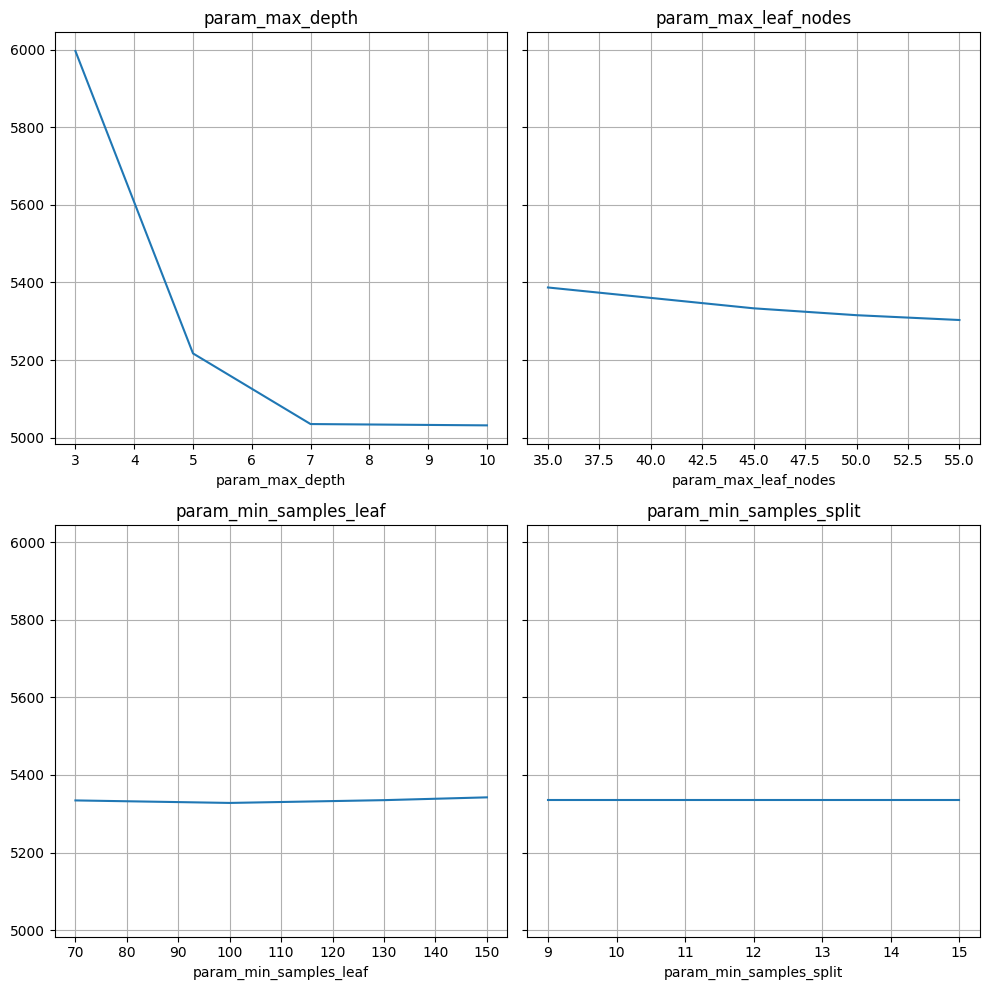

In [ ]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 



In [ ]:
df_importancia = pd.DataFrame(modelo_final_arbol_4.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

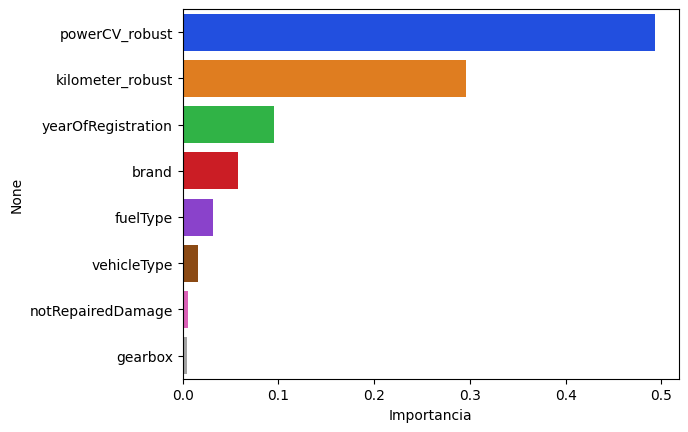

In [ ]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

# Ensamble

## Random Forest

In [ ]:
params_rf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,6,8],
    'max_depth': [10],
    'min_samples_split': [9],
    'min_samples_leaf': [40,60,80,100], 
    # 'max_leaf_nodes': [55]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rf = RandomizedSearchCV(modelo_rf, # solo hace las iteraciones que le digo
                              params_rf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = randonmized_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Utilicé unos números más altos en los estimadores, esto me trajo mejores resultados. Utilicé algunos de los demás hipervalores que vienen desde la mejor opción del decision Tree (la versión 4). Reduje el número de iteraciones a 10, lo que me permitió reducir el tiempo 

In [ ]:
modelo_final_rf

RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=40,
                      min_samples_split=9, n_estimators=250, n_jobs=-1,
                      random_state=42)

In [ ]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.738839,2093.100291,1.800843e+07,4243.634601
test,0.735889,2100.554943,1.805081e+07,4248.624073


In [ ]:
params_rf = {
    'n_estimators': [140],
    'max_features': [4],
    'max_depth': [10],
    'min_samples_split': [9],
    'min_samples_leaf': [100], 
    'max_leaf_nodes': [55]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [ ]:
modelo_final_rf


RandomForestRegressor(max_depth=10, max_features=4, max_leaf_nodes=55,
                      min_samples_leaf=100, min_samples_split=9,
                      n_estimators=140, random_state=42)

In [ ]:
grid_search_rf.best_params_


{'max_depth': 10,
 'max_features': 4,
 'max_leaf_nodes': 55,
 'min_samples_leaf': 100,
 'min_samples_split': 9,
 'n_estimators': 140}

In [ ]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.687073,2405.951838,2.157797e+07,4645.209699
test,0.687215,2405.438219,2.137743e+07,4623.573372


Estos datos se muestran sumamente bien, se ven dos r2_scores casi exactos al igual que los RMSE. No hay presencia de overfitting ni underfitting, aún así el modelo puede acercarse más a uno que es lo que buscamos.

## Gradient Booster

In [ ]:
# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [150, 160],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [10],
    'min_samples_split': [9],
    'min_samples_leaf': [55], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [ ]:
modelo_final_gb

GradientBoostingRegressor(learning_rate=0.2, max_depth=10, min_samples_leaf=55,
                          min_samples_split=9, n_estimators=160,
                          random_state=42)

In [ ]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.817103,1779.289065,1.261170e+07,3551.295727
test,0.787483,1838.329972,1.452461e+07,3811.116054


En esta ocasión el train explica el 81.7 % de variabilidad de mis datos, significa que se ha entrenado bien pero el test se queda ligeramente por debajo. No sería exactamente un overfitting porque la diferencia no es abismal. También se puede ver una diferencia entre el RMSE de ambos, donde la diferencia es de unos 260 €. Considerando que hablamos de precios de venta de coches, esta no es una diferencia tan abismal.

# XGB

In [ ]:
from xgboost import XGBRegressor

In [ ]:
params_xgb = {
    'n_estimators': [140],
    'learning_rate': [0.1],
    'max_depth': [10],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [ ]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=140, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.738562,2107.668705,1.802750e+07,4245.880934
test,0.733999,2113.740524,1.817999e+07,4263.800219


Decidí quedarme con estos parámetros porque al aumentar otros valores, me daba cuenta como mi modelo de entrenamiento (train) empezaba a sobre entrenarse y es algo que no quiero. Por eso me quedo con estos parámetros.